## Gerekli kütüphaneler:
Modelin kurulumu ve eğitim süreci için gerekli tüm paketleri içe aktarılır.

In [ ]:
import sys

sys.path.append("..")

import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from utils.preprocessing import get_data_generators, plot_training_history

ModuleNotFoundError: No module named 'utils'

## Konfigürasyonlar:
Model eğitimi için kullanılan temel parametreler tanımlanır. UC Merced dataseti default olarak `.tif` formatlı veriler içerdiği için model eğitilmeden önce `/data/tif2jpg.py` scripti ile tüm veriler `.jpg` formatına dönüştürülür.

In [ ]:
data_directory = "../data/uc_merced"
image_size = (256, 256)
batch_size = 16
epochs = 30
number_of_classes = 21 # uc_merced için 21, skyview için 15

## Veriyi yükleme ve ön işleme:
`utils/preprocessing.py` içindeki `get_data_generators` fonksiyonu kullanılarak
eğitim ve doğrulama veri kümeleri hazırlanır.

In [ ]:
print("Veri yükleniyor.")
train_gen, val_gen = get_data_generators(data_directory, image_size, batch_size)

print("Sınıf indeksleri:", train_gen.class_indices)
print("Eğitim örnekleri:", train_gen.samples)
print("Doğrulama örnekleri:", val_gen.samples)

Veri yükleniyor.
Found 11985 images belonging to 26 classes.
Found 2115 images belonging to 26 classes.
Sınıf indeksleri: {'agricultural': 0, 'airplane': 1, 'baseballdiamond': 2, 'beach': 3, 'buildings': 4, 'chaparral': 5, 'denseresidential': 6, 'desert': 7, 'forest': 8, 'freeway': 9, 'golfcourse': 10, 'grassland': 11, 'harbor': 12, 'intersection': 13, 'lake': 14, 'mediumresidential': 15, 'mobilehomepark': 16, 'mountain': 17, 'overpass': 18, 'parkinglot': 19, 'railway': 20, 'river': 21, 'runway': 22, 'sparseresidential': 23, 'storagetanks': 24, 'tenniscourt': 25}
Eğitim örnekleri: 11985
Doğrulama örnekleri: 2115


## Modelin mimarisi:
Uydu görüntülerini sınıflandırmak üzere tasarlanmış bir Convolutional Neural Network (CNN) modeli oluşturulur.

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),

    Conv2D(48, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(96, activation="relu"),
    Dropout(0.4),
    Dense(number_of_classes, activation="softmax")
])

optimizer = Adam(learning_rate=0.0005)

model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

steps_per_epoch = train_gen.samples // batch_size
validation_steps = val_gen.samples // batch_size

print("Epoch başına adım:", steps_per_epoch)
print("Doğrulama adımları:", validation_steps)

c:\Users\Casper\Desktop\LandCoverClassifier\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_57 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 125, 125, 48)   │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 62, 62, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 60, 60, 64)     │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 96)             │     5,529,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 26)             │         2,522 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,574,698 (21.27 MB)

 Trainable params: 5,574,698 (21.27 MB)

 Non-trainable params: 0 (0.00 B)

Steps per epoch: 749
Validation steps: 132


## Modelin eğitimi:
Model eğitimi başlatılır ve eğitim süreci boyunca callback mekanizmaları burada kullanılır.

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

print("Model eğitimi başladı.")
history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=val_gen,
    callbacks=[early_stop]
)

print("Model eğitimi tamamlandı.")

Model eğitimi başladı.


c:\Users\Casper\Desktop\LandCoverClassifier\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 531s 705ms/step - accuracy: 0.0542 - loss: 3.3395 - val_accuracy: 0.1291 - val_loss: 2.8954
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 402s 535ms/step - accuracy: 0.1624 - loss: 2.8654 - val_accuracy: 0.2875 - val_loss: 2.3195
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 398s 531ms/step - accuracy: 0.2862 - loss: 2.4070 - val_accuracy: 0.3820 - val_loss: 1.9529
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 401s 534ms/step - accuracy: 0.3680 - loss: 2.0671 - val_accuracy: 0.4775 - val_loss: 1.7071
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 399s 531ms/step - accuracy: 0.4048 - loss: 1.8545 - val_accuracy: 0.4733 - val_loss: 1.6180
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 382s 509ms/step - accuracy: 0.4437 - loss: 1.7387 - val_accuracy: 0.4506 - val_loss: 1.7031
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 374s 499ms/step - accuracy: 0.4623 - loss: 1.6446 - val_accuracy: 0.5267 - val_loss: 1.4840
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 375s 499ms/step - accuracy: 0.4892 -

## Sonuçları görselleştirme:
Eğitim sürecinde modelin doğruluk değerlerinin nasıl değiştiğini grafik olarak gösterilir. Eğitim ve doğrulama doğruluğu birlikte çizilerek modelin öğrenme eğrisi takip edilir.

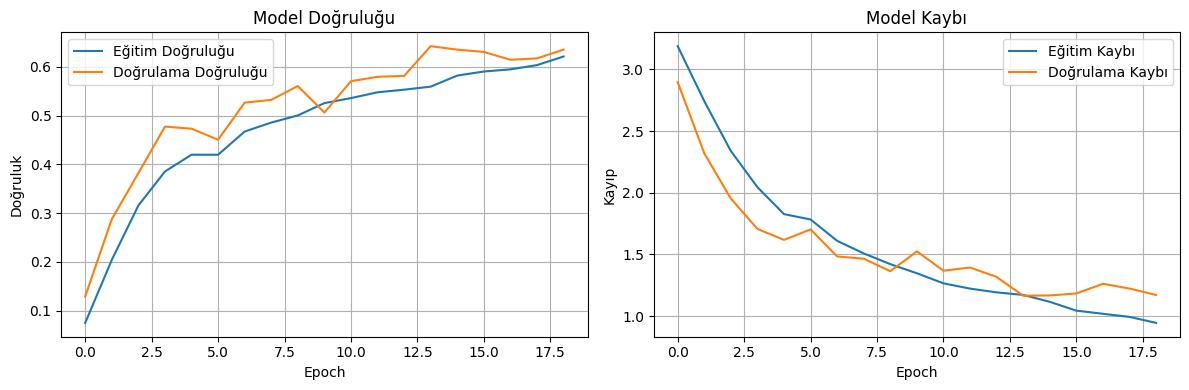

In [ ]:
plot_training_history(history)

## Modeli kaydetme:
Eğitim tamamlandıktan sonra model `.keras` formatında kaydedilir. Bu sayede daha sonra test etmek veya tekrar yüklemek üzere kullanılabilir.

In [ ]:
model.save("../models/model_uc_merced.keras")